The vast majority of the work involved in Data Analysis lies in getting the data into the right form.That's a field called Data Wrangling.A recent New York Times article cited the consensus that data scientists, according to interviews and expert estimates, spend from 50% to 80% of their time mired in this more mundane labor of collecting and preparing unruly digital data. And that's before it can be explored for useful nuggets.
In R , we use a set of tools known as the Tidyverse that allows us to import data from a wide variety of sources and transform it to a standardized format and clean it before performing our Analysis.

## Table of Contents
* [1.Missing Data](#chapter1)
    * [1.1 Types of missing data](#section_1_1)
    * [1.2 Sources of missing values](#section_1_2)
    * [1.3 Treating missing values](#section_1_3)
    * [1.4 Treating missing rows](#section_1_4)
    * [1.5 Aggregation and missing values](#section_1_5)
    
* [2.Duplicated data](#chapter2)
  * [2.1 Aggregation and missing values](#section_2_1)   
  * [2.2 Aggregations in the dataset](#section_2_2)
  
* [3.Formatting data](#chapter3)
  * [3.1 Converting dates](#section_3_1) 
  * [3.2 Unit conversions](#section_3_2) 
  * [3.3 Numbers stored as text](#section_3_3) 
  * [3.4 Text improperly converted to numbers](#section_3_4) 
  * [3.5 Inconsistent spellings](#section_3_5) 
  
* [4.Outliers](#chapter4)
  * [4.1. Screening for outliers](#section_4_1)
  * [4.2. Handling outliers](#section_4_2)
  * [4.3. Outliers use case](#section_4_3)
  * [4.4. Outliers in subgroups](#section_4_4)
  * [4.5. Detecting illogical values](#section_4_5)
* [5.Tidy data](#chapter5)
  * [5.1. Variables,observations and values](#section_5_1)
  * [5.2. Common data problems](#section_5_2)
  * [5.3  Wide vs long datasets](#section_5_3)
  * [5.4. Long vs wide datasets](#section_5_4)

## 1. Missing Data <a class="anchor" id="chapter1">

### 1.1 Types of missing data <a class="anchor" id="section_1_1">

* Missing completely at Random : This situation arises when circumstances cause some data to be missing , and there is no relationship between missing data and those circumstances for example : loosing the 100 last rows.There are very few real world situations where the data is truly missing completely at random.

* Data missing at Random : This situation occurs when there are some underlying circumstances that explain the way that data is missing, but those circumstances are explained by other variables in the dataset.

* Data missing not at random : circumstances cause some data to be missing , values of missing data are related to the reason that data is missing , MNAR can have serious impact at the remaining data. for example, imagine that we're measuring blood pressure of individuals and we have a meter that is only able to measure blood pressure values up to 180. If there are individuals in our population with blood pressures over 180, those value will be missing because they were too high to read. Situations where data is missing not at random are very serious because the absence of the missing data will impact your conclusions.

### 1.2  Sources of missing values <a class="anchor" id="section_1_2">

#### Sources of missing values 
* Refusal to provide data : for example in the case of surveys. 
* Data not yet collected. 
* Inapplicable data element : For example if we ask someone who has no children , the age of their oldest child that would result in a missing value.



Missing values are different from blank values or zero values.For example, if you ask me my income and I refuse to respond you should record that as a missing value and store it as NA. That's a lot different than just plugging in a zero value or a blank value which might imply that I have no income and skew your analysis.

### 1.3 Treating missing values <a class="anchor" id="section_1_3">
We will use a data file containing information from a survey of Americans that asked how they heat their homes. The results are broken out by age. 

In [8]:
# loading the data 
heating <- read.csv("heating.csv")
head(heating)

Source,Under.25.years.old,X25.to.29.years.old,X30.to.34.years.old,X35.to.44.years.old,X45.to.54.years.old,X55.to.64.years.old,X65.to.74.years.old,X75.years.old.and.over
Warm-air furnace,2546,5061,6701,13609,15348,15172,10380,7389
Steam or hot water system,326,672,926,1718,2137,2325,1556,1260
Electric heat pump,529,919,1106,2288,2733,2848,2010,1546
Built-in electric units,280,430,471,680,776,901,542,535
"Floor, wall, or other built-in hot-air units without ducts",267,423,513,1153,1188,1023,790,606
Room heaters with flue,15,29,66,120,176,153,104,113


In [9]:
# Transforming the data into a tidy format to maje it easier to perform analysis on.
# loading the libraries
library(readr)
library(tidyverse)
library(dplyr)
#tidy the data 
heating <- heating %>%
gather(key="age",value="homes",-Source)
head(heating)
summary(heating)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

Source,age,homes
Warm-air furnace,Under.25.years.old,2546
Steam or hot water system,Under.25.years.old,326
Electric heat pump,Under.25.years.old,529
Built-in electric units,Under.25.years.old,280
"Floor, wall, or other built-in hot-air units without ducts",Under.25.years.old,267
Room heaters with flue,Under.25.years.old,15


                                                        Source  
 Built-in electric units                                   : 8  
 Cooking stove                                             : 8  
 Electric heat pump                                        : 8  
 Fireplaces with inserts                                   : 8  
 Fireplaces without inserts                                : 8  
 Floor, wall, or other built-in hot-air units without ducts: 8  
 (Other)                                                   :64  
     age               homes          
 Length:112         Length:112        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
                                      

It doesn't make sense to have the number of homes as character string , we will convert it to numeric. 

In [10]:
# converting the column from characters to numeric data type
heating %>% 
mutate(homes=as.numeric(homes))

Warning message in mask$eval_all_mutate(quo):
"NAs introducidos por coerción"

Source,age,homes
Warm-air furnace,Under.25.years.old,2546
Steam or hot water system,Under.25.years.old,326
Electric heat pump,Under.25.years.old,529
Built-in electric units,Under.25.years.old,280
"Floor, wall, or other built-in hot-air units without ducts",Under.25.years.old,267
Room heaters with flue,Under.25.years.old,15
Room heaters without flue,Under.25.years.old,18
Portable electric heaters,Under.25.years.old,122
Stoves,Under.25.years.old,23
Fireplaces with inserts,Under.25.years.old,11


We have a warning message : NAS introduced by Coercion which means that  when the as numeric function tried to convert all these text values to numeric values, it found some that couldn't be converted.Let's check those values.

In [11]:
# checking the NA Values
heating %>% 
filter(is.na(as.numeric(homes)))

Warning message in mask$eval_all_filter(dots, env_filter):
"NAs introducidos por coerción"

Source,age,homes
Cooking stove,Under.25.years.old,.
Cooking stove,X25.to.29.years.old,Z
Cooking stove,X30.to.34.years.old,.


There are two different types of non-numeric values in this data set. Two rows have a . and one has a z. we will convert these values into zero.

In [12]:
# replacing the values to zero 
heating <- heating %>% 
mutate(homes=ifelse(homes==".",0,homes)) %>% 
mutate(homes=ifelse(homes=="Z",0,homes)) %>% 
mutate(homes=as.numeric(homes))

### 1.4 Treating missing rows <a class="anchor" id="section_1_4">
Missing rows are usually much more difficult to detect because there's no row there to analyze. Detecting missing rows generally requires some additional subject matter knowledge. For example, if we know that there is supposed to be a row in a data set for every year and we have rows for 1990 through 2016 and then another row for 2018, it's logical to conclude that 2017 is missing. Let's take a look at an example of a data file that's missing rows in R. 
This dataset contains data about the number of acres of national forest land in each of the states in the united States.

In [11]:
# load the data 
land <- read_csv("C:/Users/Atolb/publiclands.csv")
# check the data 
summary(land)
# how many rows we have 
nrow(land)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  State = col_character(),
  PublicLandAcres = col_double()
)



    State           PublicLandAcres   
 Length:42          Min.   :   16000  
 Class :character   1st Qu.:  606250  
 Mode  :character   Median : 1156000  
                    Mean   : 4577905  
                    3rd Qu.: 7592500  
                    Max.   :22083000  

[1] 42

Checking the number of rows , we have 42 rows.In this case , we can apply some subject matter expertise here and take the fact that we know that there are 50 states and conclude that some data is missing from this dataset.

In [12]:
# checking the names of all the states 
unique(land$State)

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Florida"        "Georgia"       
 [9] "Idaho"          "Illinois"       "Indiana"        "Kansas"        
[13] "Kentucky"       "Louisiana"      "Maine"          "Michigan"      
[17] "Minnesota"      "Mississippi"    "Missouri"       "Montana"       
[21] "Nebraska"       "Nevada"         "New Hampshire"  "New Mexico"    
[25] "New York"       "North Carolina" "North Dakota"   "Ohio"          
[29] "Oklahoma"       "Oregon"         "Pennsylvania"   "South Carolina"
[33] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[37] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[41] "Wisconsin"      "Wyoming"

There are eight states missing. We don't have any data for Connecticut, Delaware, Hawaii, Iowa, Maryland, Massachusetts, New Jersey or Rhode Island. We don't know why the data is missing , we can look at the original source for this data file on the U.S Forest service website.
Looking at the original source , we noticed that these states have zeroes under total area of land.

In [13]:
# creating a data table for the missing states 
missing_states <- tibble(State = c('Connecticut','Delaware','Hawai','Iowa','Maryland','Massachusetts','New Jersey','Rhode Island'),PublicLandAcres = c(0,0,0,0,0,0,0,0)) # nolint


Now , we will combine the two dataframes : land & missing states.Since both datasets have the same structure we can use the function rbind().

In [14]:
land <- rbind(land,missing_states)
nrow(land)

[1] 50

### 1.5 Aggregation and missing values <a class="anchor" id="section_1_5">
- when it comes to aggregate functions , we should exercise caution when working with datasets that have missing values, since the result impact in the analysis. 

- Aggregate functions summarize data in a data set to help us better understand the data. You likely use them all the time. Common examples of aggregate functions are calculating the mean or average of a variable, determining the median value of the variable, finding the maximum or minimum value and calculating the sum of all the values from a variable. 

In [20]:
# loading a data file about employees 
employees <- read_csv("C:/Users/Atolb/employees.csv")
# taking a glimpse about the data 
head(employees)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  FirstName = col_character(),
  LastName = col_character(),
  Salary = col_double(),
  NumDependents = col_double()
)



FirstName,LastName,Salary,NumDependents
Alexander,Hamilton,40000,3
Aaron,Burr,50000,2
George,Washington,60000,1
Maria,Reynolds,NA,4
Angelica,Schuyler,10000,NA
Hercules,Mulligan,20000,0


As we can see , we have some missing values . For instance the salary of Maria Reynolds and so is the number of dependentes for Angelica Schuyler.

### Let's work on some aggregate functions

In [22]:
sum(employees$Salary)
mean(employees$Salary)
min(employees$Salary)
max(employees$Salary)

[1] NA

[1] NA

[1] NA

[1] NA

Since there are some missing values in the dataset. The result of these aggregate functions is also a missing value. A solution to this problem is  modifying the original functions here: sum, mean and max by adding to the end the NA.RM=true argument.

By adding this argument R went through and did these calculations, it pretended that Maria wasn't in the data set and calculated the sum, mean, and maximum value for everybody else. 

In [24]:
sum(employees$Salary,na.rm=TRUE)
mean(employees$Salary,na.rm=TRUE)
min(employees$Salary,na.rm=TRUE)
max(employees$Salary,na.rm=TRUE)

[1] 180000

[1] 36000

[1] 10000

[1] 60000

## 2. Duplicated Data <a class="anchor" id="chapter2">

### 2.1 Duplicated rows and values <a class="anchor" id="section_2_1">

It is very common to find duplicated rows in a dataset. This situation requires further investigation. However , duplicated rows are not necessarily incorrect. There may be a perfectly valid reason to have the same row twice in a dataset.
For instance , having records corresponding to two different people with the same name. Second , the same customer may have ordered the same product two different times.

In [30]:
# loading the dataset 
continents <- read_csv("C:/Users/Atolb/continents.csv")
# taking a look at the data 
head(continents,10)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Continent = col_character(),
  Size = col_double(),
  Population = col_double()
)



Continent,Size,Population
Africa,11668599,1110635000
Antarctica,5400000,4490
Antarctica,5400000,4490000
Asia,17212000,4298723000
Australia,3291903,38304000
Europe,3930000,452000
Europe,3930000,452000
Europe,3930000,452000
North America,9540000,565265000
South America,6890000,406740000


we can see that we have 3 different records for Europe.

In [44]:
# using unique function 
continents <- unique(continents)
head(continents,10)

Continent,Size,Population
Africa,11668599,1110635000
Antarctica,5400000,4490
Asia,17212000,4298723000
Australia,3291903,38304000
Europe,3930000,452000
North America,9540000,565265000
South America,6890000,406740000


we can see that those duplicated rows for Europe are completely eliminated.however , we have some inconsistent and duplicated data for Antarctica. An optimal solution here is to apply common sense. 4490 people living in Antarctica is much more reasonable than 4 millions. To remove this row , we will use a filter function to remove any records for Antarctica that have a population of more than 100000.

In [45]:
continents <- continents %>% 
filter(!(Continent == 'Antarctica' & Population > 100000)) # to select data different from Antarctica and population > 100000 # nolint


In [46]:
head(continents,10)

Continent,Size,Population
Africa,11668599,1110635000
Antarctica,5400000,4490
Asia,17212000,4298723000
Australia,3291903,38304000
Europe,3930000,452000
North America,9540000,565265000
South America,6890000,406740000


### 2.2 Aggregations in the dataset <a class="anchor" id="section_2_2">
It is very common to have data that includes pre-computed aggregations , especially when dealing with census data. This issue can impact the integrity of the dataset.
The dataset we will use includes information about the population of the city of Carpinteria in California. 

In [49]:
# Loading the data 
carpinteria <- read_csv("C:/Users/Atolb/population.csv")
head(carpinteria,10)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Subject = col_character(),
  Population = col_double()
)



Subject,Population
Total,13553
Male,6514
Female,7039
Under 5 years,635
5 to 9 years,554
10 to 14 years,552
15 to 19 years,796
20 to 24 years,1006
25 to 34 years,1839
35 to 44 years,1634


In [50]:
sum(carpinteria$Population)

[1] 40659

It is very rare that around 40 thousands people live in carpinteria since it's a small beach town. To confirm that , we can use wikipedia.
As we can see , as per 2021 around 13 thousands people live in carpinteria. This number is quite far from 40 thousands.
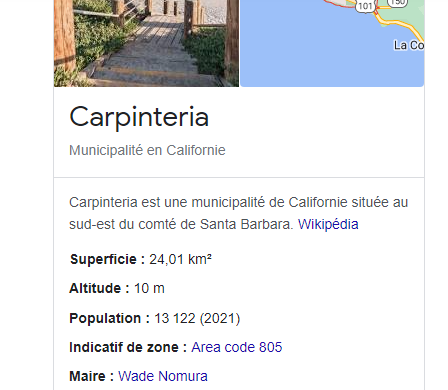

The data has some summary rows. It has a line for the total population and it has breakouts by gender and also by age.
If we sum the data , we end up counting each person in the city three times, once in the total, once for their gender, and once for their age group.
If we want to break the data by age , we need to remove the row that has the total value and also the rows that have breakouts by gender.

In [52]:
carpinteria <- carpinteria %>%
filter(!Subject %in% c('Total','Male','Female'))
# let's sum the data again 
sum(carpinteria$Population)

[1] 13553

Now , the result makes more sense and is consistent with what we have seen in wikipedia.

## 3. Formatting Data <a class="anchor" id="chapter3">


### 1. Converting dates <a class="anchor" id="section_3_1">
Date and time values can be some of the trickiest data to manipulate in R.To manipulate data , we use the library lubridate. 
The library lubridate is used for two main tasks : 
* deconstructing dates and times. 
* constructing dates and times. 

If we have existing date or date/time value we can use functions from lubridate package to pull out individual components of that date and time. 
* The year() function extracts only the year from the date.
* The month() function extracts only the month value. 
* The day() function extracts the day of the month.
* The wday() function tells us the day of the week.
* The yday function tells us the day of the year.

There are similar function for deconstructing times: 
* The hour() function returns the hour of the day. 
* The minute() function returns the minute portion of the time.
* The second() function similarly provides the number of seconds in a time.

Date construction functions: 
* date construction functions 
- mdy() April 1 , 2018 
- ymd() 2018-04-01
- dmy() 01-04-2018
- mdy_hms() April 1 , 2018 04:32:16 
- ymd_hms() 2018-04-01 , 04:32:16
- dmy_hms() 01-04-2018 , 04:32:16

In [3]:
# loading the data : ontaining some Mexican weather readings. Let's take a look at what that gives us. This data set looks like it contains over 33,000 records that include temperature readings from Mexican weather stations.
weather <- read.csv("C:/Users/Atolb/mexicanweather.csv")
str(weather)

'data.frame':	33712 obs. of  4 variables:
 $ station: Factor w/ 1 level "MX000017004": 1 1 1 1 1 1 1 1 1 1 ...
 $ element: Factor w/ 2 levels "TMAX","TMIN": 1 2 1 2 1 2 1 2 1 2 ...
 $ value  : int  310 150 310 200 300 160 270 150 230 140 ...
 $ date   : Factor w/ 16871 levels "1955-04-01","1955-04-02",..: 1 1 31 31 61 61 91 91 121 121 ...


In [5]:
# Extracting date elements from the date column 
library(lubridate)
weather$year <- year(weather$date)
weather$month <- month(weather$date) 
weather$day <- day(weather$date)
head(weather,3)

Warning message:
"package 'lubridate' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."


station,element,value,date,year,month,day
MX000017004,TMAX,310,1955-04-01,1955,4,1
MX000017004,TMIN,150,1955-04-01,1955,4,1
MX000017004,TMAX,310,1955-05-01,1955,5,1


In [9]:
# checking the wday 
wday("2018-04-01") # gives us the result : 1 which means its the first day of the week : sunday.
yday("2018-04-01") # gives us the result : 91 which means the 1st of april 2018 was the 91st day of the year.
# converting dates
mdy("04/01/2018")
dmy("04/01/2018")

[1] 1

[1] 91

[1] "2018-04-01"

[1] "2018-01-04"

### 2. Unit conversions <a class="anchor" id="section_3_2">
One of the situations we can face , when analyzing data is the lack of metadata and in particular, a failure to specify the units.In this case , we need to add some context to the data and apply a little domain knowledge to be able to make assumptions about the unit measurements.

In [10]:
# Let's make this dataset t a little wider to get the 
# minimum and maximum temperatures as part of the same observation.
# That requires the spread function
library(tidyverse)
weather <- weather %>%
  spread(element, value)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date()        masks base::date()
x dplyr::filter()          masks stat

In [11]:
# That's the right format, but take a look at the data
head(weather,10)
# It's pretty sparse.  We really don't need all of those lines that have two NA values
weather <- weather %>%
  filter(!(is.na(TMAX) & is.na(TMIN)))

station,date,year,month,day,TMAX,TMIN
MX000017004,1955-04-01,1955,4,1,310,150
MX000017004,1955-04-02,1955,4,2,310,150
MX000017004,1955-04-03,1955,4,3,310,160
MX000017004,1955-04-04,1955,4,4,320,150
MX000017004,1955-04-05,1955,4,5,330,160
MX000017004,1955-04-06,1955,4,6,320,160
MX000017004,1955-04-07,1955,4,7,320,160
MX000017004,1955-04-08,1955,4,8,330,160
MX000017004,1955-04-09,1955,4,9,330,160
MX000017004,1955-04-10,1955,4,10,330,170


In [12]:
library(dplyr)
weather <- weather %>%
  rename(maxtemp=TMAX , mintemp = TMIN) %>%
  select(station,date,mintemp,maxtemp)


In [13]:
# divide the temperature / 10 both for the minimum and the maximum 
weather <- weather %>%
  mutate(mintemp=mintemp/10) %>%
  mutate(maxtemp=maxtemp/10)

In [15]:
# Next, convert them to Fahrenheit
weather <- weather %>%
  mutate(mintemp=mintemp*(9/5)+32) %>%
  mutate(maxtemp=maxtemp*(9/5)+32)

### 3. Numbers stored as text <a class="anchor" id="section_3_3">
Data quality issues can be caused by currency values that don't have clearly specified units. This issue requires cleaning prior to performing any analysis. Moreover the formatting of currency values may cause issues when importing data.
Let's use a dataset containing information on medicare expense reimbursement.

In [17]:
names <- c("DRG","ProviderID","Name","Address","City","State","ZIP","Region","Discharges",
           "AverageCharges" ,"AverageTotalPayments","AverageMedicarePayments"
           )
# loading the data 
inpatient <- read_tsv("C:/Users/Atolb/inpatient.tsv",skip=1,col_names=names)
summary(inpatient)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  DRG = col_character(),
  ProviderID = col_double(),
  Name = col_character(),
  Address = col_character(),
  City = col_character(),
  State = col_character(),
  ZIP = col_character(),
  Region = col_character(),
  Discharges = col_double(),
  AverageCharges = col_character(),
  AverageTotalPayments = col_character(),
  AverageMedicarePayments = col_character()
)




     DRG              ProviderID         Name             Address         
 Length:163065      Min.   : 10001   Length:163065      Length:163065     
 Class :character   1st Qu.:110092   Class :character   Class :character  
 Mode  :character   Median :250007   Mode  :character   Mode  :character  
                    Mean   :255570                                        
                    3rd Qu.:380075                                        
                    Max.   :670077                                        
     City              State               ZIP               Region         
 Length:163065      Length:163065      Length:163065      Length:163065     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

we can see that averagechargers , averagetotalpayments and averagemedicarepayments are read-in as character strings.
we need to explicitly define , the data types of the variables that we want when we load the data:
c stands for character , i is integer , n is numeric.

In [18]:
types <- 'ciccccccinnn'
inpatient <- read_tsv("C:/Users/Atolb/inpatient.tsv",skip=1,col_names=names,col_types=types)
summary(inpatient)

     DRG              ProviderID         Name             Address         
 Length:163065      Min.   : 10001   Length:163065      Length:163065     
 Class :character   1st Qu.:110092   Class :character   Class :character  
 Mode  :character   Median :250007   Mode  :character   Mode  :character  
                    Mean   :255570                                        
                    3rd Qu.:380075                                        
                    Max.   :670077                                        
     City              State               ZIP               Region         
 Length:163065      Length:163065      Length:163065      Length:163065     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

### 4. Text improperly converted to numbers <a class="anchor" id="section_3_4">
Another common issue that occurs with reading in data, is when text data is improperly read into a numeric data type. The key observation is that numerals aren't always numeric. Sometimes they're just text, and treating them as numeric values can cause real problems.

In [55]:
capitals <- read_csv("C:/Users/Atolb/capitals.csv")
str(capitals)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  State = col_character(),
  Capital = col_character(),
  ZIP = col_double(),
  Population = col_number()
)




spec_tbl_df[,4] [50 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ State     : chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ Capital   : chr [1:50] "Montgomery" "Juneau" "Phoenix" "Little Rock" ...
 $ ZIP       : num [1:50] 36101 99801 85001 72201 94203 ...
 $ Population: num [1:50] 361748 30737 4039182 652834 2067117 ...
 - attr(*, "spec")=
  .. cols(
  ..   State = col_character(),
  ..   Capital = col_character(),
  ..   ZIP = col_double(),
  ..   Population = col_number()
  .. )


In [22]:
capitals %>%
filter(State=="Vermont" & Capital == "Montpelier")

State,Capital,ZIP,Population
Vermont,Montpelier,5601,7954


The zip code for Vermont is of 4 digits but its not correct as it should have 5 digits. The problem is that when reading the data , the 0 disappeared because the zip code was read-in as numeric when it should be read as character string.this is why its important to specify the data types when loading the data.

### 5. Inconsistent spellings <a class="anchor" id="section_3_5">
Another source of chaos when it comes to data analysis is spelling errors particularly when trying to group results.

In [23]:
names <- c('inspectionID','RestaurantName' , 'OtherName','LicenseNumber','FacilityType','Risk',
           'Address','City','State','ZIP','InspectionDate','InspectionType','Results','Violations',
           'Latitude' , 'Longitude','Location')

Inspection <- read_csv("C:/Users/Atolb/inspections.csv",col_names=names,skip=1)
names(Inspection) <- names


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  inspectionID = col_double(),
  RestaurantName = col_character(),
  OtherName = col_character(),
  LicenseNumber = col_double(),
  FacilityType = col_character(),
  Risk = col_character(),
  Address = col_character(),
  City = col_character(),
  State = col_character(),
  ZIP = col_double(),
  InspectionDate = col_character(),
  InspectionType = col_character(),
  Results = col_character(),
  Violations = col_character(),
  Latitude = col_double(),
  Longitude = col_double(),
  Location = col_character()
)




In [24]:
# calculate total inspections per restaurant and arrange them in a descending order 
Inspection %>%
  group_by(RestaurantName) %>%
  summarize(Inspection=n()) %>%
  arrange(desc(Inspection))

RestaurantName,Inspection
SUBWAY,2020
DUNKIN DONUTS,1023
MCDONALD'S,458
7-ELEVEN,363
MCDONALDS,260
CHIPOTLE MEXICAN GRILL,243
POTBELLY SANDWICH WORKS LLC,212
CORNER BAKERY CAFE,181
SPORTSERVICE SOLDIER FIELD,176
POTBELLY SANDWICH WORKS,166


We can see that Mcdonalds is both at row 3 and row 5 , this gives us a clue that's something gone wrong here.  Let's go through and find some common misspellings of the word McDonald's in the data set.

In [29]:
Inspection %>%
  filter(grepl("McDo",RestaurantName,ignore.case=TRUE)) %>%
  filter(RestaurantName!= 'SARAH MCDONALD STEELE') %>%
  select(RestaurantName) %>%
  unique
# we can see that we have quite few mispellings of Mcdonald's.

RestaurantName
MCDONALD
MCDONALDS
MCDONALD'S #20104
MCDONALD'S
MCDONALDS #29307
McDONALD'S
MCDONALD'S RESTAURANTS
McDonald's Restaurant
McDonald's
McDONALDS


In [30]:
alternates <- Inspection %>%
  filter(grepl("McDo",RestaurantName,ignore.case=TRUE)) %>%
  filter(RestaurantName!= 'SARAH MCDONALD STEELE') %>%
  select(RestaurantName) %>%
  unique %>%
  pull(RestaurantName) # to have it as a vector

In [ ]:
# replace the mispelling with the correct spelling we want it to have 
Inspection <- Inspection %>%
  mutate(RestaurantName=ifelse(RestaurantName %in% alternates , 'MCDONALDS',RestaurantName))


## 4. Outliers <a class="anchor" id="chapter4">
Outliers are data points that lie far outside the norm, and they may occur in two cases. First, outliers may indicate some type of error in the dataset. Someone may have measured the data incorrectly in the first place, incorrectly input it into a system, or performed a calculation improperly.


### 1. Screening for outliers <a class="anchor" id="section_4_1">
To detect outliers , we can use : histograms or boxplots.The box plot uses single data points to represent outlier values that fall outside of the whiskers.
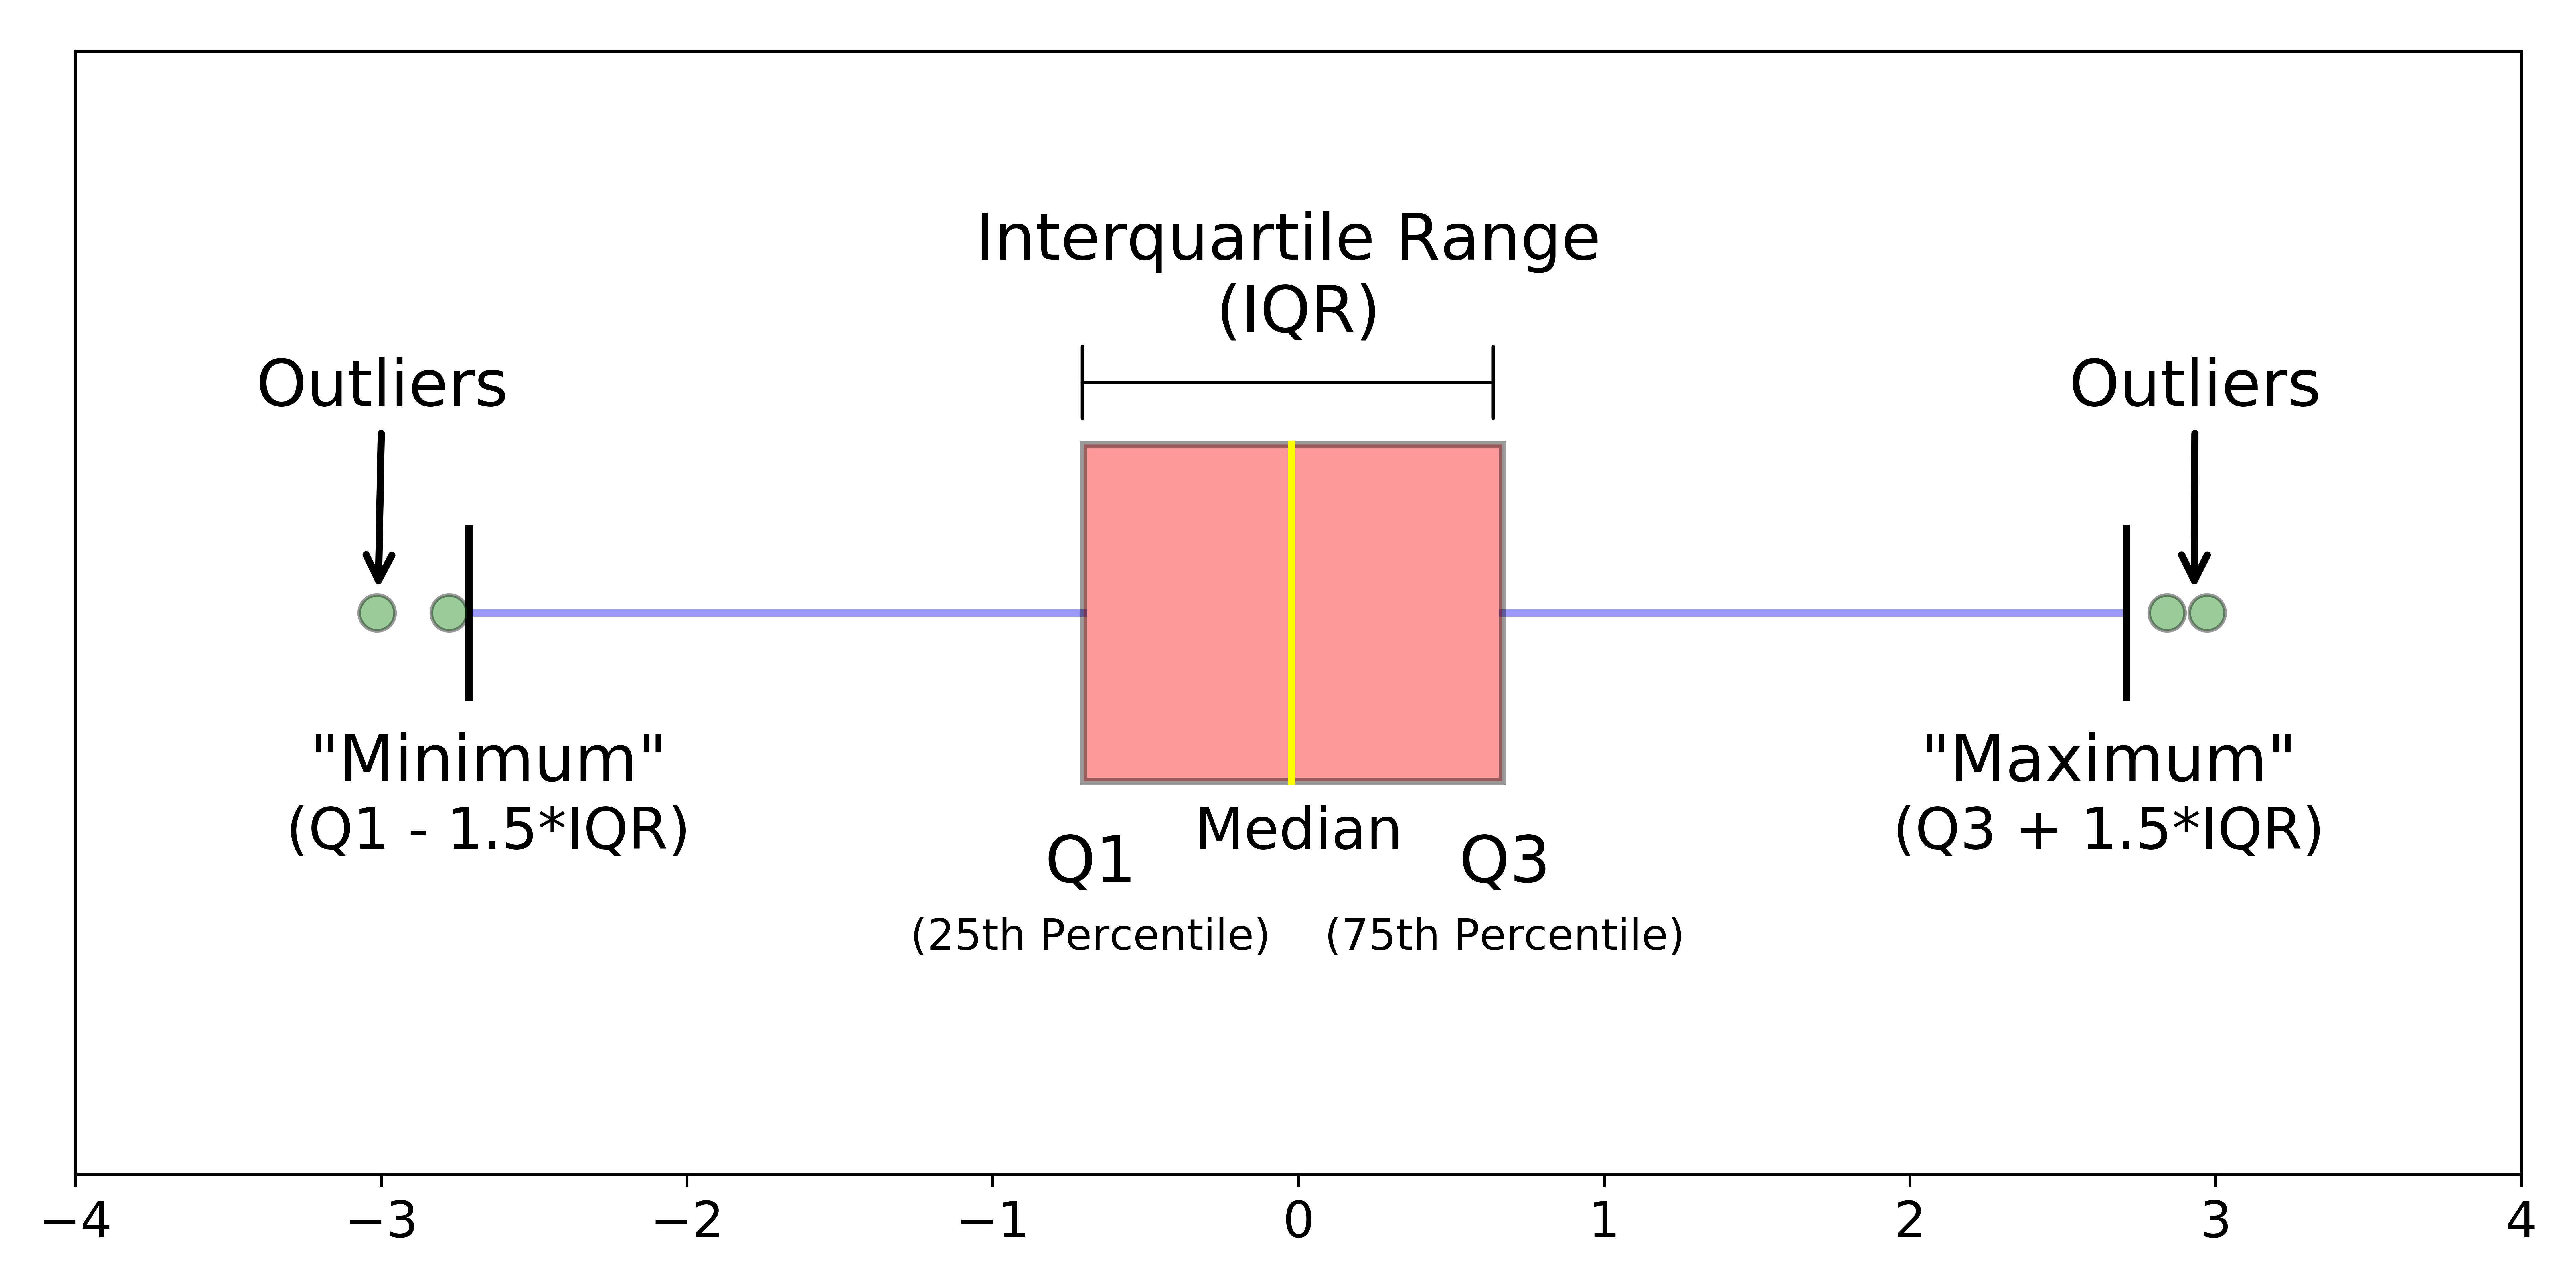

### 2. Handling outliers <a class="anchor" id="section_4_2">
*  First, you might decide to remove records containing outliers from the dataset entirely. If you have no way of coming up with a reasonable value for the outlier and that variable is critical to your analysis, you might decide to simply remove that row. The larger your dataset, the more likely it is that you can safely do this.

*  In other cases, there might still be valuable data remaining in the record. In that case, you can treat the outlier as a missing value and simply replace it with a NA.

*  If you have subject manner expertise or external data sources available to you, you may be able to correct the outlying value by replacing it with the correct information.



There are also three techniques that you can use to replace the missing data with values that you believe will approximate real data. 

- We can use a technique called imputation. To impute a missing value, you replace it with the mean, median or mode of that variable. You may do this across the entire dataset or you may perform imputation based on the values of other variables. For example, if you're imputing height values for a population, you might replace unknown heights with the median height for that person's gender.

-  Second, you can assume that outlying values are correct but still decide you wish to correct them so that they don't have an undue influence on your dataset. In this case, you might decide to use a technique known as capping where you replace the outlying values with the highest or lowest non-outlying values from the dataset. 


- Finally, you might be able to predict the missing value by using predictive analytics techniques. For example, you might build a regression model that predicts a variable based upon your dataset and then use that model to populate the missing values.

### 3. Outliers use case <a class="anchor" id="section_4_3">

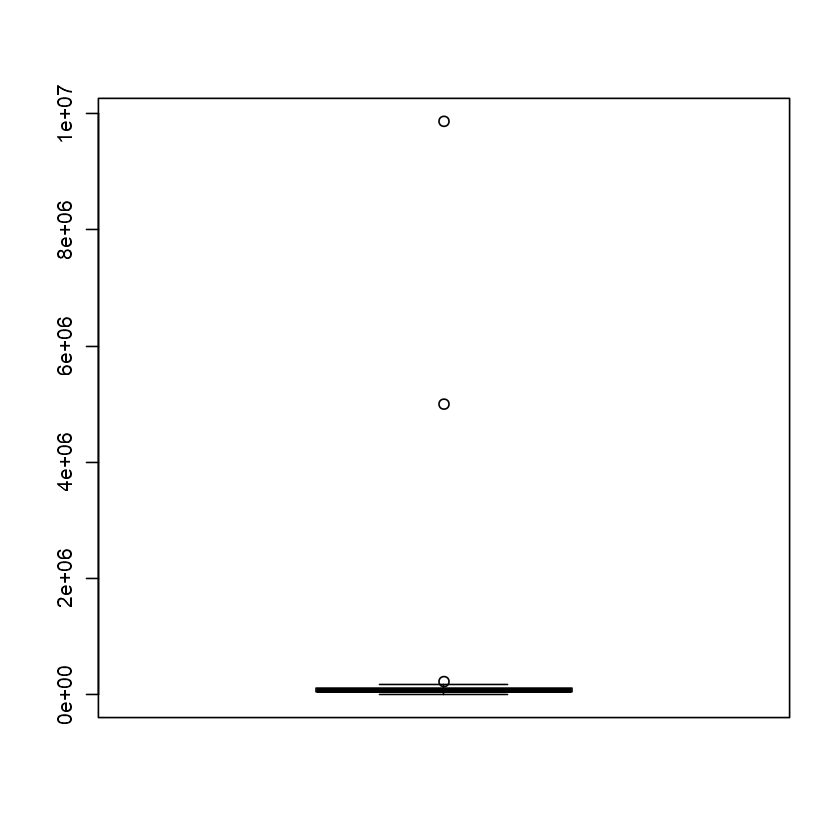

In [31]:
whitehouse <- read_csv("C:/Users/Atolb/whitehouse.csv" ,col_types="ccncci") # salary information
boxplot(whitehouse$Salary)


There are some outliers that appear to have salary values of over one million dollars

In [32]:
# picking up those records
whitehouse %>%
filter(Salary > 1000000)

Name,Status,Salary,Pay Basis,Position Title,Year
"Case, Michael A.",Employee,5000000,Per Annum,SENIOR WRITER,2011
"Blair, Patricia A.",Employee,9866900,Per Annum,CHIEF CALLIGRAPHER,2015


In [34]:
# as we are not sure about the correct value we will replace the salary for these two employees with NA. 
whitehouse <- whitehouse %>%
  mutate(Salary=ifelse(Salary > 1000000,NA,Salary))


### 4. Outliers in subgroups <a class="anchor" id="section_4_4">

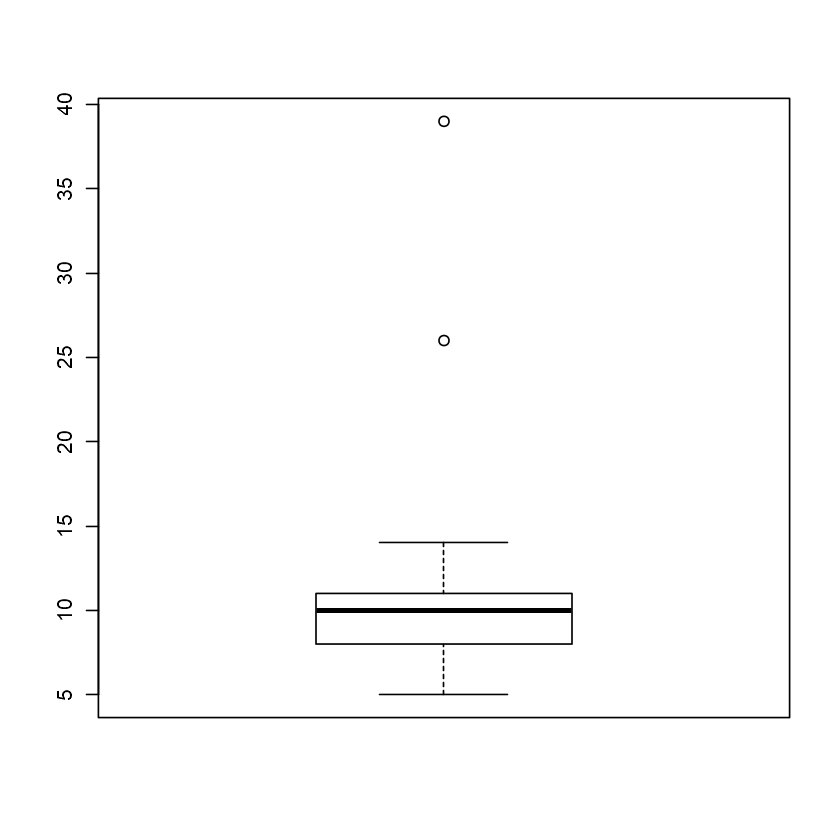

In [35]:
# outliers in subgroups 
tests <- read.csv("C:/Users/Atolb/testscores.csv")
boxplot(tests$age)
# there are students over 15 years in the elementary school which are clearly outliers 

In [36]:
tests %>%
filter(age >15)

ï..studentID,age,grade,testScore
10115,39,2,91
10116,26,7,70


A 39 year old second grader, and a 26 year old seventh grader. Those are clearly incorrect, and I can handle these two cases with any of my approaches for handling outliers.

In [39]:
# replace with the correct age , -common sense
names(tests)[1] <- "studentID"
tests <- tests %>%
  mutate(age=ifelse(studentID==10015,7,age)) %>%
  mutate(age=ifelse(studentID==10016,12,age))


### 5. Detecting illogical values <a class="anchor" id="section_4_5">
Apart from outliers we can also have illogical values.

In [40]:
residents <- read_csv("C:/Users/Atolb/residents.csv" ,col_types="iillll")
summary(residents)

    personID           age         employed        ownsHome      
 Min.   :   1.0   Min.   :18.00   Mode :logical   Mode :logical  
 1st Qu.: 516.5   1st Qu.:31.00   FALSE:424       FALSE:837      
 Median :1032.0   Median :42.00   TRUE :1639      TRUE :1226     
 Mean   :1032.0   Mean   :42.22                                  
 3rd Qu.:1547.5   3rd Qu.:54.00                                  
 Max.   :2063.0   Max.   :65.00                                  
 rentsHome        ownsCar       
 Mode :logical   Mode :logical  
 FALSE:1224      FALSE:635      
 TRUE :839       TRUE :1428     
                                
                                
                                

In [42]:
residents %>%
filter(ownsHome == rentsHome)

personID,age,employed,ownsHome,rentsHome,ownsCar
17,55,TRUE,FALSE,FALSE,TRUE
134,19,TRUE,TRUE,TRUE,FALSE
203,43,FALSE,TRUE,TRUE,TRUE
382,60,FALSE,TRUE,TRUE,TRUE
1269,56,TRUE,TRUE,TRUE,TRUE
1902,31,TRUE,FALSE,FALSE,FALSE


home ownership and renting a home are mutually exclusive activities. People should probably either be one or the other but not both. There are 837 people who don't own a home and 839 people who rent a home. There's something illogical going on here
A solution to this problem would be eliminating those records from the data.

## 5. Tidy data <a class="anchor" id="chapter5">

The term tidy data describes data that has been put into a standardized format that facilitates future analytic work.
Tidy data facilitates initial data exploration and analysis work. If our data is in a standardized format, it's much easier to notice trends, anomalies, and other important features of our data sets. Second, tidy data improves our ability to collaborate with others. If our data is in a standardized format, we can easily share it with other people, who will then be able to quickly begin analyzing it without having to go through their own data wrangling work first. And finally, if we convert our data to a tidy format, we can take advantage of many R packages that accept tidy data as input without performing additional transformations.


### 1. Variables , observations and values <a class="anchor" id="section_5_1">
Tidy data uses three different terms to describe the data that we can structure. 
* Variables measure some underlying attribute of the entity that we are measuring. For example, if we're measuring people's health, variables might be each person's height, weight, and blood pressure. 

* Observations are the collections of all the variable measurements related to a single entity. Normally at a single point in time. For example, we might record a person's height, weight and blood pressure on Tuesday. That would be a single observation. If we measured that same person's vital statistics again on Thursday that would be a second observation.

* Values are at the intersection of variables and observations. For example, the value of my height variable on Tuesday might be 70 inches.

### 2. Common data problems <a class="anchor" id="section_5_2">
The common problems that appear in untidy datasets are : 
- where the column header contain values instead of variable names.
- datasets that store multiple variables in a single column.
- datasets that store variables in both rows and columns.
- datasets that store different types of observational units in the same table.
- datasets where a single observational unit is spread across multiple tables.

### 3. wide vs long datasets <a class="anchor" id="section_5_3">
The difference between wide and long datasets boils down to whether we prefer to have more columns in our dataset or more rows. A dataset that emphasizes putting additional data about a single subject in columns is called a wide dataset because, as we add more columns, the dataset becomes wider. Similarly, a dataset that emphasizes including additional data about a subject in rows is called a long dataset because, as we add more rows, the dataset becomes longer. It's important to point out that there's nothing inherently good or bad about wide or long data.
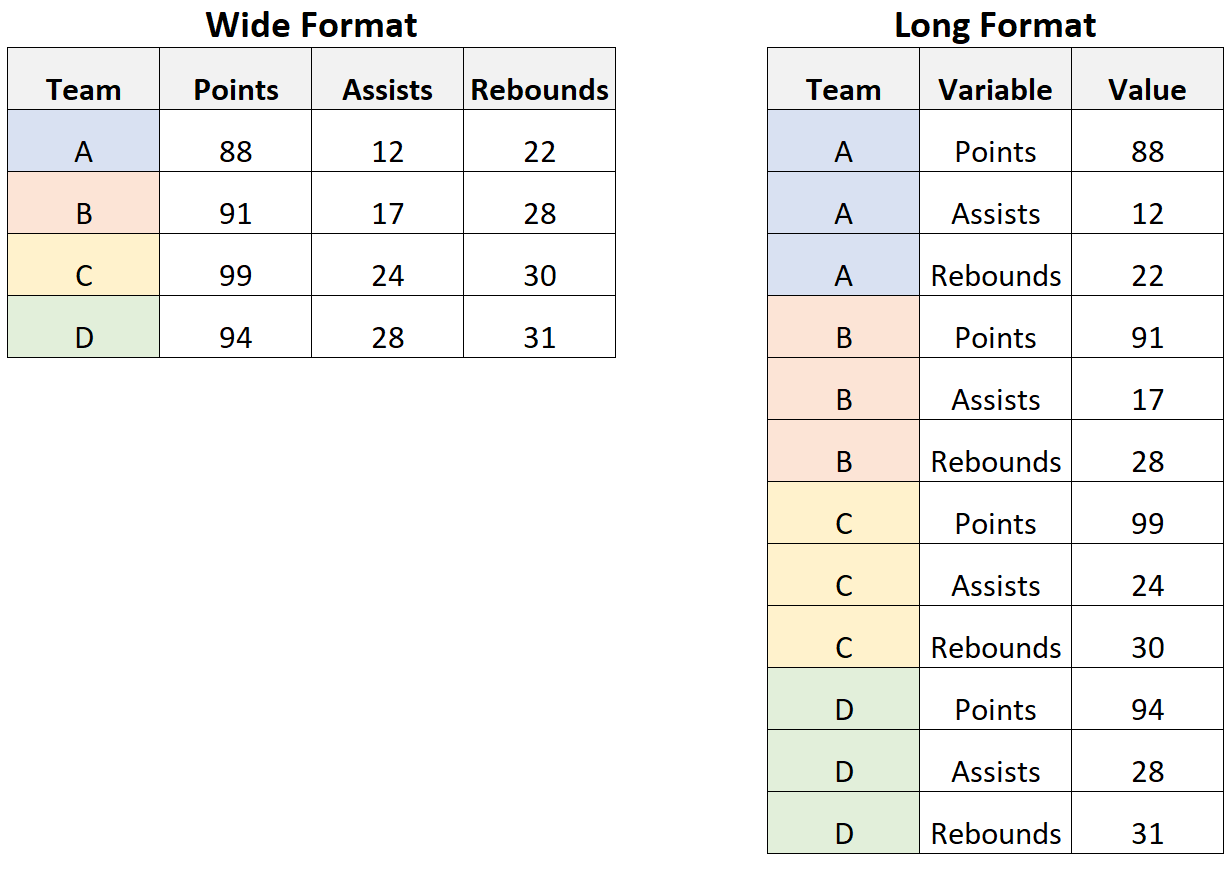

In [51]:
# reading the dataset
pew <- read_csv("C:/Users/Atolb/pew.csv")
head(pew,5)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  religion = col_character(),
  `<$10k` = col_double(),
  `$10-20k` = col_double(),
  `$20-30k` = col_double(),
  `$30-40k` = col_double(),
  `$40-50k` = col_double(),
  `$50-75k` = col_double(),
  `$75-100k` = col_double(),
  `$100-150k` = col_double(),
  `>$150k` = col_double(),
  `Don't know/refused` = col_double()
)




religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>$150k,Don't know/refused
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don't know/refused,15,14,15,11,10,35,21,17,18,116


In [52]:
pew.long <- gather(pew,income,freq,-religion)
head(pew.long,5)

religion,income,freq
Agnostic,<$10k,27
Atheist,<$10k,12
Buddhist,<$10k,27
Catholic,<$10k,418
Don't know/refused,<$10k,15


### 4. long vs wide datasets <a class="anchor" id="section_5_4">


In [53]:
weather <- read_csv("C:/Users/Atolb/mexicanweather.csv")
head(weather,3)
weather.wide <- spread(weather,element,value)
head(weather.wide,3)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  station = col_character(),
  element = col_character(),
  value = col_double(),
  date = col_date(format = "")
)




station,element,value,date
MX000017004,TMAX,310,1955-04-01
MX000017004,TMIN,150,1955-04-01
MX000017004,TMAX,310,1955-05-01


station,date,TMAX,TMIN
MX000017004,1955-04-01,310,150
MX000017004,1955-04-02,310,150
MX000017004,1955-04-03,310,160
